# Lab | Hypothesis Testing

**Objective**

Welcome to the Hypothesis Testing Lab, where we embark on an enlightening journey through the realm of statistical decision-making! In this laboratory, we delve into various scenarios, applying the powerful tools of hypothesis testing to scrutinize and interpret data.

From testing the mean of a single sample (One Sample T-Test), to investigating differences between independent groups (Two Sample T-Test), and exploring relationships within dependent samples (Paired Sample T-Test), our exploration knows no bounds. Furthermore, we'll venture into the realm of Analysis of Variance (ANOVA), unraveling the complexities of comparing means across multiple groups.

So, grab your statistical tools, prepare your hypotheses, and let's embark on this fascinating journey of exploration and discovery in the world of hypothesis testing!

**Challenge 1**

In this challenge, we will be working with pokemon data. The data can be found here:

- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv

In [1]:
#libraries
import pandas as pd
import scipy.stats as st
import numpy as np



In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv")
df

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


- We posit that Pokemons of type Dragon have, on average, more HP stats than Grass. Choose the propper test and, with 5% significance, comment your findings.

In [4]:
from scipy import stats

# Hypotheses:
# H0: The average HP of Dragon-type Pokémon is equal to or less than that of Grass-type Pokémon
# H1: The average HP of Dragon-type Pokémon is greater than that of Grass-type Pokémon

# Select HP values for Dragon and Grass Pokémon
hp_dragon = df[df['Type 1'] == 'Dragon']['HP']
hp_grass = df[df['Type 1'] == 'Grass']['HP']

# Perform Welch's t-test (does not assume equal variances)
t_stat, p_value_two_tailed = stats.ttest_ind(hp_dragon, hp_grass, equal_var=False)

# Convert to one-tailed p-value
if hp_dragon.mean() > hp_grass.mean():
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)

# Print results
print("Mean HP (Dragon):", hp_dragon.mean())
print("Mean HP (Grass):", hp_grass.mean())
print("t-statistic:", t_stat)
print("p-value (one-tailed):", p_value_one_tailed)

# Conclusion at 5% significance
if p_value_one_tailed < 0.05:
    print("Reject H0: Dragon-type Pokémon have significantly higher HP than Grass-type Pokémon.")
else:
    print("Fail to reject H0: No sufficient evidence that Dragon-type Pokémon have higher HP than Grass-type Pokémon.")


Mean HP (Dragon): 83.3125
Mean HP (Grass): 67.27142857142857
t-statistic: 3.3349632905124063
p-value (one-tailed): 0.0007993609745420597
Reject H0: Dragon-type Pokémon have significantly higher HP than Grass-type Pokémon.


We reject H0. With 95% confidence, we can say that Dragon-type Pokémon have, on average, more HP than Grass-type Pokémon.

- We posit that Legendary Pokemons have different stats (HP, Attack, Defense, Sp.Atk, Sp.Def, Speed) when comparing with Non-Legendary. Choose the propper test and, with 5% significance, comment your findings.


In [5]:
from statsmodels.multivariate.manova import MANOVA

# Hypotheses:
# H0: Legendary and Non-Legendary Pokémon have equal mean stats
# H1: There is at least one stat where Legendary and Non-Legendary Pokémon differ

# Select only relevant columns
stats_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Split into Legendary vs Non-Legendary
legendary = df[df['Legendary'] == True][stats_cols]
non_legendary = df[df['Legendary'] == False][stats_cols]

# ----- MANOVA -----
# Create new DataFrame for statsmodels
df_manova = df[stats_cols + ['Legendary']]
df_manova['Legendary'] = df_manova['Legendary'].astype(int)  # 0 = Non-Legendary, 1 = Legendary

# Run MANOVA
maov = MANOVA.from_formula('HP + Attack + Defense + Q("Sp. Atk") + Q("Sp. Def") + Speed ~ Legendary', data=df_manova)
print(maov.mv_test())

# ----- Individual Welch's t-tests -----
print("\nIndividual Welch's t-tests per stat:")
for col in stats_cols:
    t_stat, p_val = stats.ttest_ind(legendary[col], non_legendary[col], equal_var=False)
    print(f"{col}: mean Legendary = {legendary[col].mean():.2f}, mean Non-Legendary = {non_legendary[col].mean():.2f}, p = {p_val:.4e}")


                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0592 6.0000 793.0000 2100.8338 0.0000
         Pillai's trace  0.9408 6.0000 793.0000 2100.8338 0.0000
 Hotelling-Lawley trace 15.8953 6.0000 793.0000 2100.8338 0.0000
    Roy's greatest root 15.8953 6.0000 793.0000 2100.8338 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
          Legendary        Value  Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
             Wilks' lambda 0.7331 6.0000 793.0000 48.1098 0.0000
            Pillai's trace 0.2669 6.0000 793.

/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_66469/2095126641.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manova['Legendary'] = df_manova['Legendary'].astype(int)  # 0 = Non-Legendary, 1 = Legendary


The MANOVA tells us that when we consider all the stats together, legendary Pokémon are statistically different from non-legendary Pokémon.

The t-tests show that this difference does not depend on a single variable: in each stat separately, Legendaries have significantly higher means than Non-Legendaries.

Conclusion:

👉 Legendary Pokémon are stronger in absolutely every dimension measured (HP, Attack, Defence, Sp. Atk, Sp. Def, Speed).

In [11]:
df.columns

Index(['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

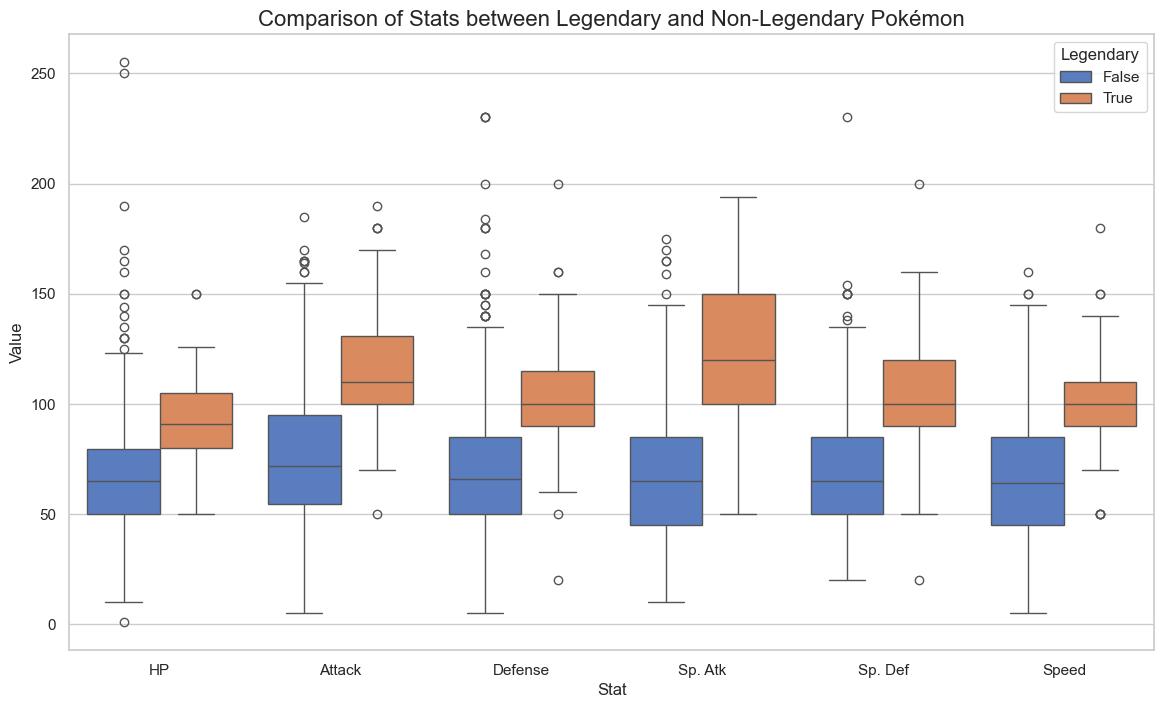

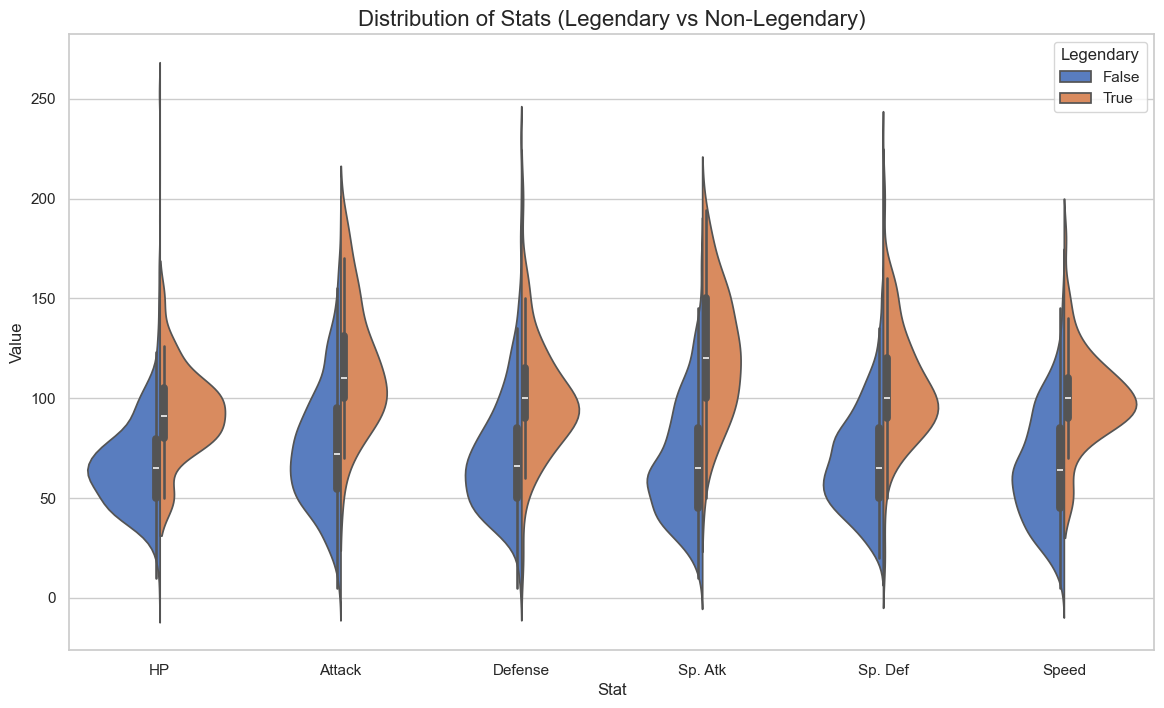

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Stats to compare
stats_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Set plot style
sns.set(style="whitegrid", palette="muted")

# Create boxplots
plt.figure(figsize=(14, 8))
df_melted = df.melt(id_vars=['Legendary'], value_vars=stats_cols, 
                    var_name='Stat', value_name='Value')

sns.boxplot(data=df_melted, x='Stat', y='Value', hue='Legendary')
plt.title("Comparison of Stats between Legendary and Non-Legendary Pokémon", fontsize=16)
plt.xlabel("Stat")
plt.ylabel("Value")
plt.legend(title="Legendary")
plt.show()

# --- Alternative: violin plots for more detail ---
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_melted, x='Stat', y='Value', hue='Legendary', split=True)
plt.title("Distribution of Stats (Legendary vs Non-Legendary)", fontsize=16)
plt.xlabel("Stat")
plt.ylabel("Value")
plt.legend(title="Legendary")
plt.show()


**Challenge 2**

In this challenge, we will be working with california-housing data. The data can be found here:
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


**We posit that houses close to either a school or a hospital are more expensive.**

- School coordinates (-118, 34)
- Hospital coordinates (-122, 37)

We consider a house (neighborhood) to be close to a school or hospital if the distance is lower than 0.50.

Hint:
- Write a function to calculate euclidean distance from each house (neighborhood) to the school and to the hospital.
- Divide your dataset into houses close and far from either a hospital or school.
- Choose the propper test and, with 5% significance, comment your findings.
 

In [23]:
#H0: Houses close to a school or hospital have the same median house value as houses far from them.
#H1: Houses close to a school or hospital have different (higher) median house value than houses far away.

In [24]:
# School and Hospital coordinates
school_coords = (-118, 34)
hospital_coords = (-122, 37)

# Euclidean distance function
def euclidean_distance(lon1, lat1, lon2, lat2):
    return np.sqrt((lon1 - lon2)**2 + (lat1 - lat2)**2)

# Calculate distance to school and hospital
df['dist_school'] = euclidean_distance(df['longitude'], df['latitude'], school_coords[0], school_coords[1])
df['dist_hospital'] = euclidean_distance(df['longitude'], df['latitude'], hospital_coords[0], hospital_coords[1])


In [25]:
# Flag houses as "close" if distance < 0.50 to either
df['close'] = ((df['dist_school'] < 0.50) | (df['dist_hospital'] < 0.50))



In [26]:
# Split data
house_close = df[df['close'] == True]['median_house_value']
house_far = df[df['close'] == False]['median_house_value']

In [27]:
# Welch's t-test
t_stat, p_value = stats.ttest_ind(house_close, house_far, equal_var=False)

# Results
print("Mean house value (close):", house_close.mean())
print("Mean house value (far):", house_far.mean())
print("t-statistic:", t_stat)
print("p-value:", p_value)

Mean house value (close): 246951.98213501245
Mean house value (far): 180678.44105790975
t-statistic: 37.992330214201516
p-value: 3.0064957768592614e-301


In [28]:
# Conclusion at 5% significance
if p_value < 0.05:
    print("Reject H0: Houses close to a school or hospital are significantly more expensive.")
else:
    print("Fail to reject H0: No sufficient evidence that proximity to a school or hospital affects house value.")

Reject H0: Houses close to a school or hospital are significantly more expensive.


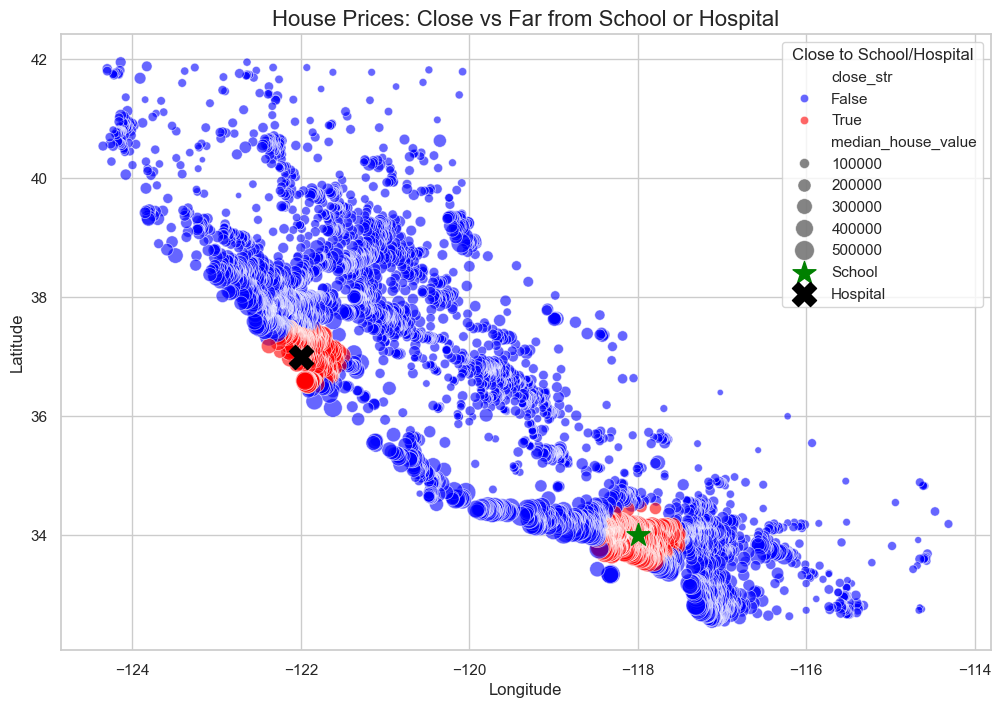

In [30]:
df['close_str'] = df['close'].astype(str)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df, 
    x='longitude', 
    y='latitude', 
    hue='close_str',            
    size='median_house_value',
    palette={'True': 'red', 'False': 'blue'},  # now matches
    alpha=0.6,
    sizes=(20, 200)
)
plt.scatter(school_coords[0], school_coords[1], color='green', marker='*', s=300, label='School')
plt.scatter(hospital_coords[0], hospital_coords[1], color='black', marker='X', s=300, label='Hospital')
plt.title("House Prices: Close vs Far from School or Hospital", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Close to School/Hospital')
plt.show()



- Scatter plot:

Red points = houses close to school/hospital

Blue points = houses far

Size = median house value

Green star = school, black X = hospital